In [40]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import itertools
import nltk
from nltk.corpus import stopwords
import string
import pandas as pd

df = pd.read_csv("yelp.csv")


In [41]:
import nltk  
nltk.download('punkt')  
nltk.download('stopwords')  

def clean_review_text(review):  
    review = review.lower()  
    review = review.translate(str.maketrans('', '', string.punctuation))  
    stop_words = set(stopwords.words('english'))  
    tokens = nltk.word_tokenize(review)  
    return [word for word in tokens if word.isalpha() and word not in stop_words]  

df['cleaned_text'] = df['text'].apply(clean_review_text)  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\casey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\casey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


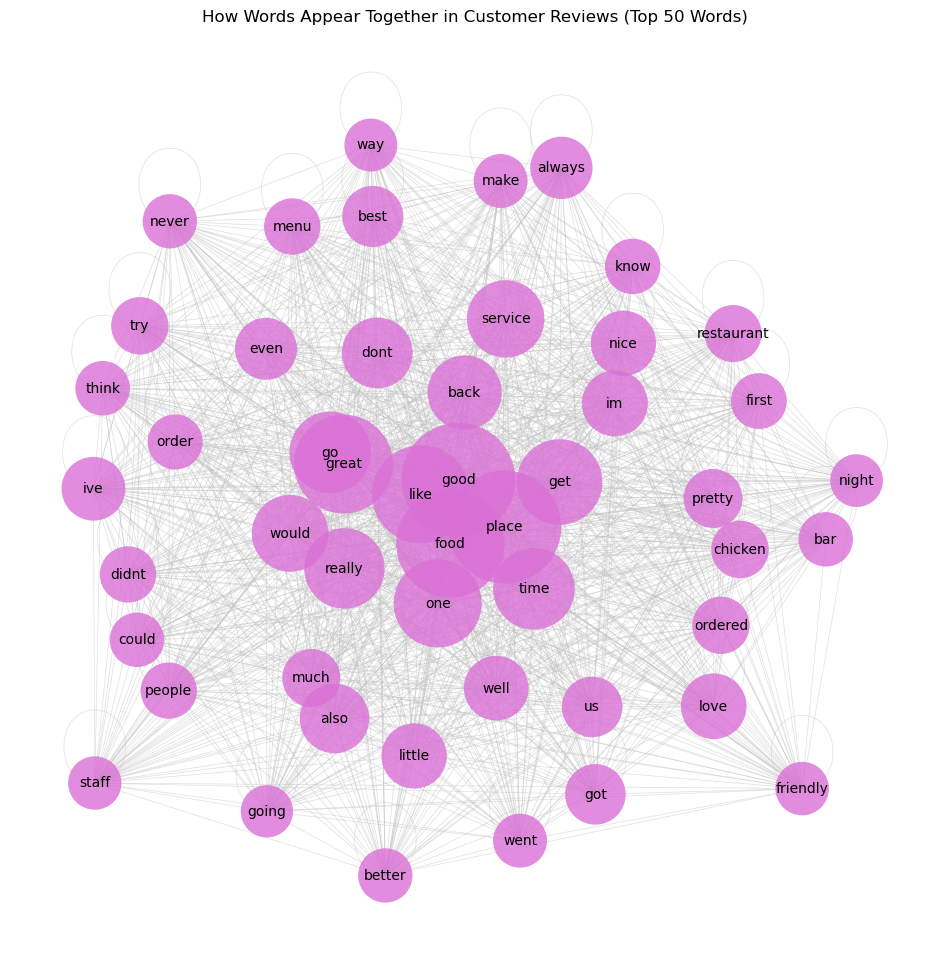

In [44]:
# building a word network from the cleaned reviews
G = nx.Graph()

for review in df['cleaned_text']:
    for word1, word2 in itertools.combinations(review, 2):
        if G.has_edge(word1, word2):
            G[word1][word2]['weight'] += 1 
        else:
            G.add_edge(word1, word2, weight=1) 

# finding the 50 most common words (to reduce size of data_)
word_counts = Counter(word for review in df['cleaned_text'] for word in review)
top_50_words = [word for word, count in word_counts.most_common(50)]

# subgraph of the top 50 words
G_top_words = G.subgraph(top_50_words)

node_sizes = [word_counts[word] * 1 for word in G_top_words.nodes()]

plt.figure(figsize=(12, 12))
layout = nx.spring_layout(G_top_words, k=0.5, iterations=50, seed=42)

nx.draw_networkx_nodes(
    G_top_words,
    layout,
    node_size=node_sizes,
    node_color='orchid',
    alpha=0.8,
    linewidths=0
)

nx.draw_networkx_edges(
    G_top_words,
    layout,
    alpha=0.5,
    width=0.5,
    edge_color='silver'
)

nx.draw_networkx_labels(
    G_top_words,
    layout,
    font_size=10,
    font_color='black'
)

plt.title("How Words Appear Together in Customer Reviews (Top 50 Words)")
plt.axis('off')
plt.show()

In [45]:
degree_scores = nx.degree_centrality(G_sub)
betweenness_scores = nx.betweenness_centrality(G_sub)
eigenvector_scores = nx.eigenvector_centrality(G_sub)

# finding the most influential words (of the top 50)
top_degree = sorted(degree_scores.items(), key=lambda item: item[1], reverse=True)[:3]
top_betweenness = sorted(betweenness_scores.items(), key=lambda item: item[1], reverse=True)[:3]
top_eigenvector = sorted(eigenvector_scores.items(), key=lambda item: item[1], reverse=True)[:3]

# display the top 3 words in each measure
print("Most connected words:", top_degree)
print("Words that bridge connections:", top_betweenness)
print("Words connected to other important words:", top_eigenvector)


Most connected words: [('well', 1.040816326530612), ('also', 1.040816326530612), ('us', 1.040816326530612)]
Words that bridge connections: [('well', 0.0), ('also', 0.0), ('us', 0.0)]
Words connected to other important words: [('well', 0.1414213562373095), ('also', 0.1414213562373095), ('us', 0.1414213562373095)]
